# 📈 **Linear Regression**

**In Machine Learning and this notebook we use Scikit-learn a lot.**

<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/download_(1)_slz6.png" border="0" alt="آپلود عکس" /></a>

### **What is scikit-learn used for?**

Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

#### **What is linear regression used for?**

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

# **Making Predictions with Linear Regression**

Given the representation is a linear equation, making predictions is as simple as solving the equation for a specific set of inputs.

Let’s make this concrete with an example. Imagine we are predicting weight (y) from height (x). Our linear regression model representation for this problem would be:

**y = B0 + B1 * x1** |  **y = mx1+c**

or

**weight =B0 +B1 * height** | **weight = m*height+c**

Where B0 is the bias coefficient and B1 is the coefficient for the height column. We use a learning technique to find a good set of coefficient values. Once found, we can plug in different height values to predict the weight.

For example, lets use B0/c = 0.1 and B1/m = 0.5. Let’s plug them in and calculate the weight (in kilograms) for a person with the height of 182 centimeters.

weight = 0.1 + 0.5 * 182

weight = 91.1

You can see that the above equation could be plotted as a line in two-dimensions. The B0 is our starting point regardless of what height we have. We can run through a bunch of heights from 100 to 250 centimeters and plug them to the equation and get weight values, creating our line.

<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/sample-height-vs-weight-linear-regression_10h7.png" border="0" alt="آپلود عکس" /></a>

Now that we know how to make predictions given a learned linear regression model, let’s look at some rules of thumb for preparing our data to make the most of this type of model.

# 📤 Import & Install Libraries

In [ ]:
!pip install hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

%matplotlib inline

## 💾 Check out the Data

In [ ]:
df=pd.read_csv('Real estate.csv')

In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.shape

(414, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

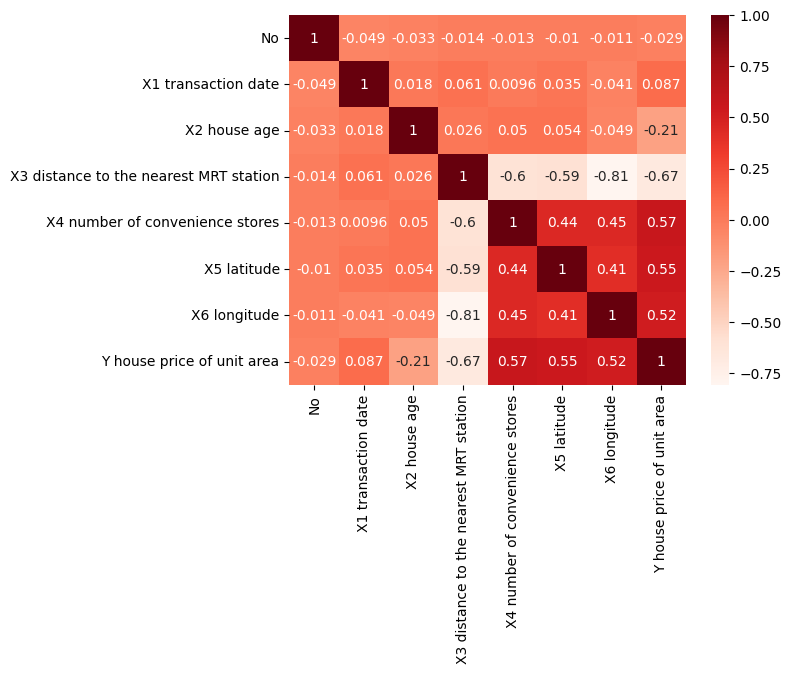

In [ ]:
sns.heatmap(df.corr(), annot=True,cmap='Reds')

# 📊 Exploratory Data Analysis (EDA)

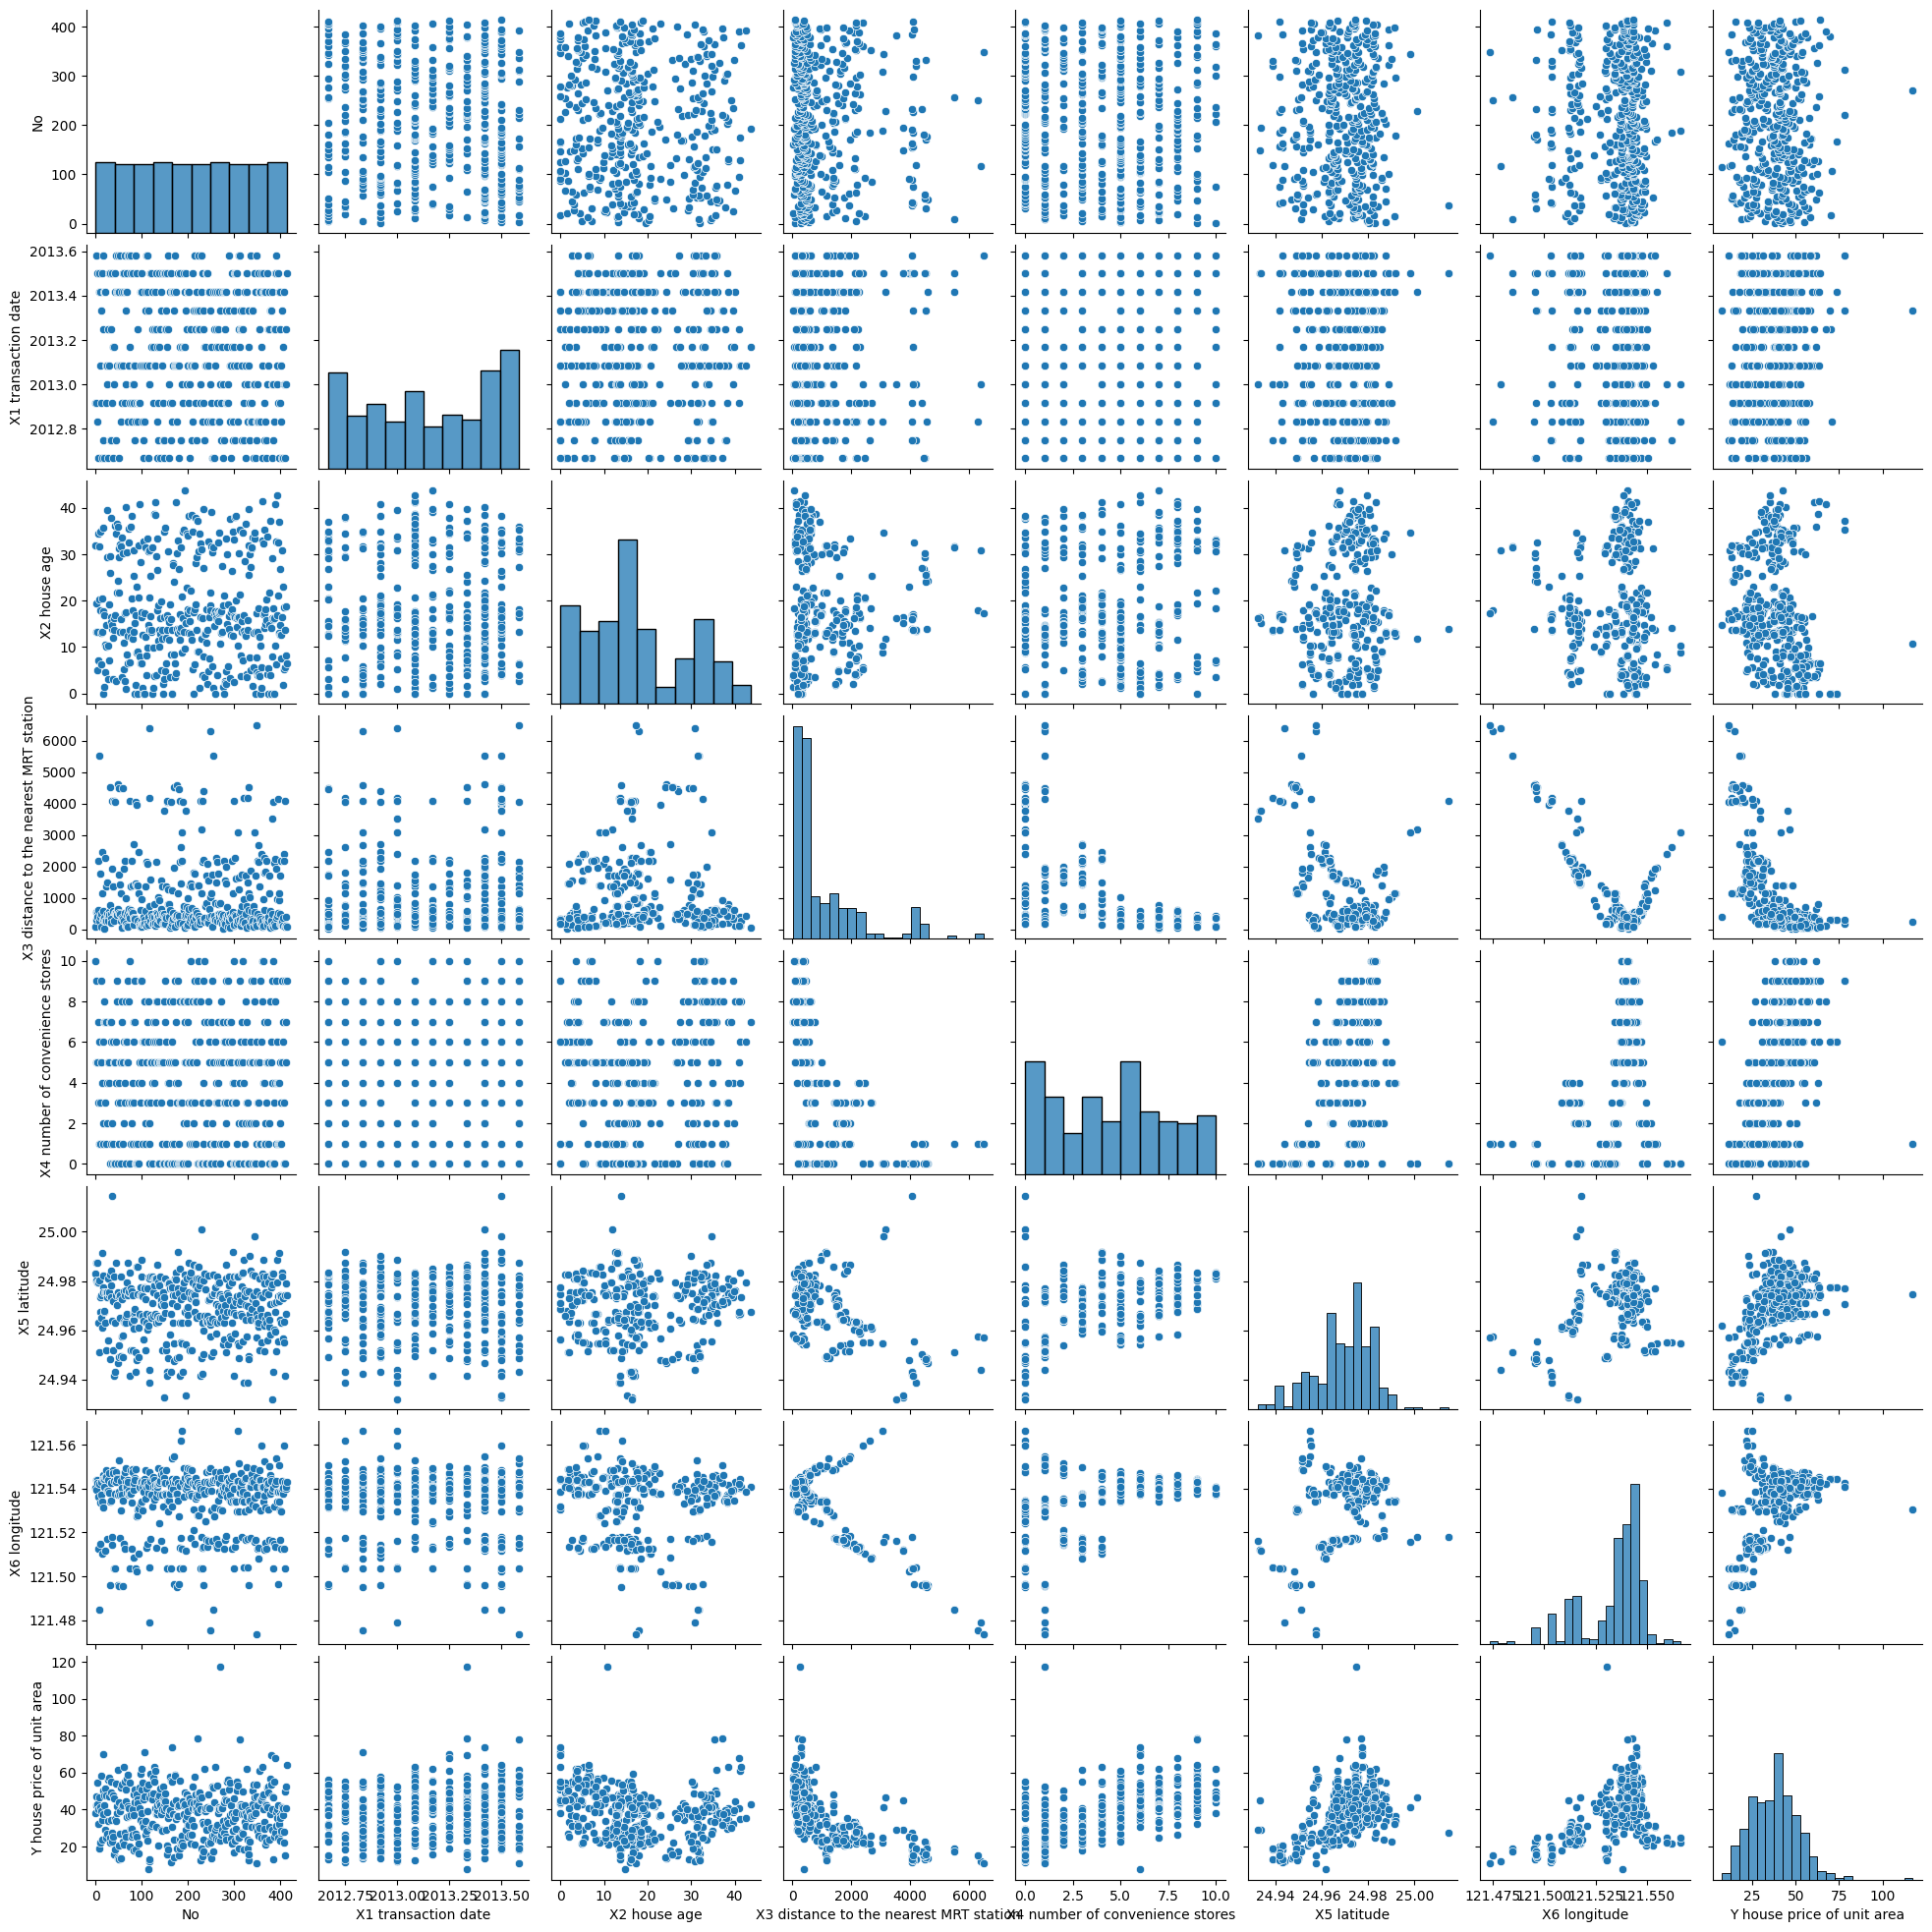

In [ ]:
sns.pairplot(df)

**Pairplot reveals:**

✔ House price is non-linearly dependent on several features
✔ There is a clear spatial trend (latitude & longitude)
✔ X2 (distance to MRT) has a strong negative effect
✔ X3 (convenience stores) has a positive effect, but not linear
✔ Some relationships show curved patterns → linear regression is not enough
🧩 Detailed Feature-by-Feature Interpretation
1️⃣ House Price vs Distance to MRT (X2)

This is one of the strongest patterns.

✔ Clear negative relationship

As MRT distance increases, house price decreases.
The scatter plot forms a downward curve (non-linear).

👉 Key insight: Linear Regression will underperform here because the relationship is curved.

2️⃣ House Price vs Number of Convenience Stores (X3)
✔ Positive trend: More convenience stores → Higher prices

But:

The scatter is noisy

Relationship is somewhat clustered and step-wise

👉 Suggests convenience stores are an important categorical-ish discriminator.

3️⃣ House Price vs House Age (X1)

This is interesting:

❌ No clear linear pattern

You can see:

Prices are high for both very new and very old houses

Middle-aged houses have weak correlation

Some U-shaped or inverse-U patterns appear

👉 Again shows non-linearity
👉 Age alone is not a strong driver

4️⃣ House Price vs Latitude

Here we see a solid pattern:

✔ Houses towards northern latitudes have higher prices

This is expected (closer to main city area).

The scatter looks like a tight, tilted stripe — strong relationship.

5️⃣ House Price vs Longitude

Similarly:

✔ Higher longitude → Higher prices

Clear pattern with moderate correlation.

6️⃣ Spatial Relationship (Latitude vs Longitude)

This pairplot has dense clusters.

👉 Indicates the dataset represents several small neighborhoods with similar coordinates.

7️⃣ X2 vs X3 (MRT distance vs convenience stores)

Here you notice:

✔ The closer you are to MRT, the more convenience stores around

This agrees with real-world city planning.

Also:

Clustered points

Relationship is roughly inverse (more stores where MRT is nearby)

👉 Strong multi-collinearity
👉 Caution: Distance to MRT and No. of stores carry overlapping information.

8️⃣ Distributions on the Diagonal

X1 (Age) → uniform-ish distribution

X2 (MRT distance) → long right tail (positively skewed)

X3 (stores) → categorical (0–10 mostly)

Price → cluster around 30 with outliers

Latitude/Longitude → grouped clusters (neighborhoods)

These indicate:

👉 Dataset is not normal
👉 Linear Regression assumptions are violated

# 📈 Training a Linear Regression Model

## X and y arrays

In [ ]:
X=df.drop('Y house price of unit area', axis=1)

y=df['Y house price of unit area']

In [ ]:
print("X=",X.shape,"\ny=", y.shape)

X= (414, 7) 
y= (414,)


## 🧱 Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train.shape

(289, 7)

In [ ]:
X_test.shape

(125, 7)

# ✔️ Linear Regression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

## ✔️ Model Evaluation

In [ ]:
model.coef_

array([-2.92429686e-03,  4.68668437e+00, -2.75675355e-01, -4.24850544e-03,
        1.17832502e+00,  2.40947692e+02,  1.86694591e+01])

In [ ]:
pd.DataFrame(model.coef_, X.columns, columns=['Coedicients'])

,Coedicients
No,-0.002924
X1 transaction date,4.686684
X2 house age,-0.275675
X3 distance to the nearest MRT station,-0.004249
X4 number of convenience stores,1.178325
X5 latitude,240.947692
X6 longitude,18.669459


## ✔️ Predictions from our Model

In [ ]:
y_pred = model.predict(X_test)

## ✔️ Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are **loss functions**, because we want to minimize them.

In [ ]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [ ]:
MAE

5.373024532571052

In [ ]:
MSE

45.88030742874099

In [ ]:
RMSE

np.float64(6.773500382279534)

In [ ]:
df['Y house price of unit area'].mean()

np.float64(37.980193236714975)

## **Residual Histogram**

* **Often for Linear Regression it is a good idea to separately evaluate residuals $$(y-\hat{y})$$ and not just calculate performance metrics (e.g. RMSE).**

* **Let's explore why this is important...**

* **The residual eerors should be random and close to a normal distribution.**


<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/download_ycg.png" border="0" alt="آپلود عکس" /></a>

<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/2_pe68.png" border="0" alt="آپلود عکس" /></a>

In [ ]:
test_residual= y_test - y_pred

In [ ]:
pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

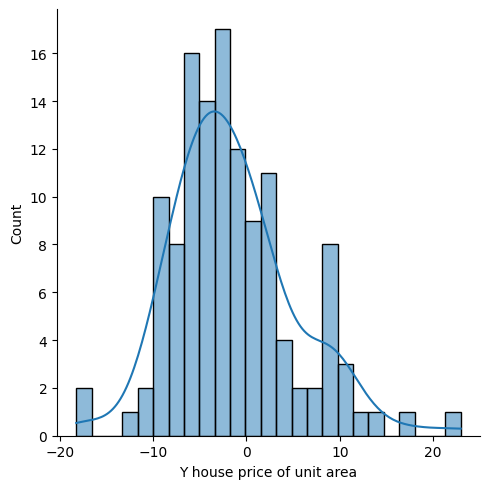

In [ ]:
sns.displot(test_residual, bins=25, kde=True)

* **Residual plot shows residual error VS. true y value.**

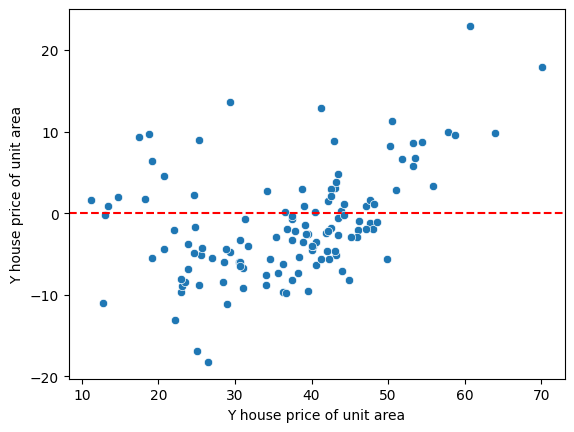

In [ ]:
sns.scatterplot(x=y_test, y=test_residual)

plt.axhline(y=0, color='r', ls='--')

* **Residualplot showing a clear pattern, indicating Linear Regression no valid!**

# Finished, but you can copy this notebook and start practicing.

In [ ]:
# Basic info
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Descriptive stats
print("\nStatistical Description:\n", df.describe())

# Missing values
print("\nMissing Values:\n", df.isna().sum())


Dataset Shape: (414, 8)

Data Types:
 No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

Statistical Description:
                No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distan

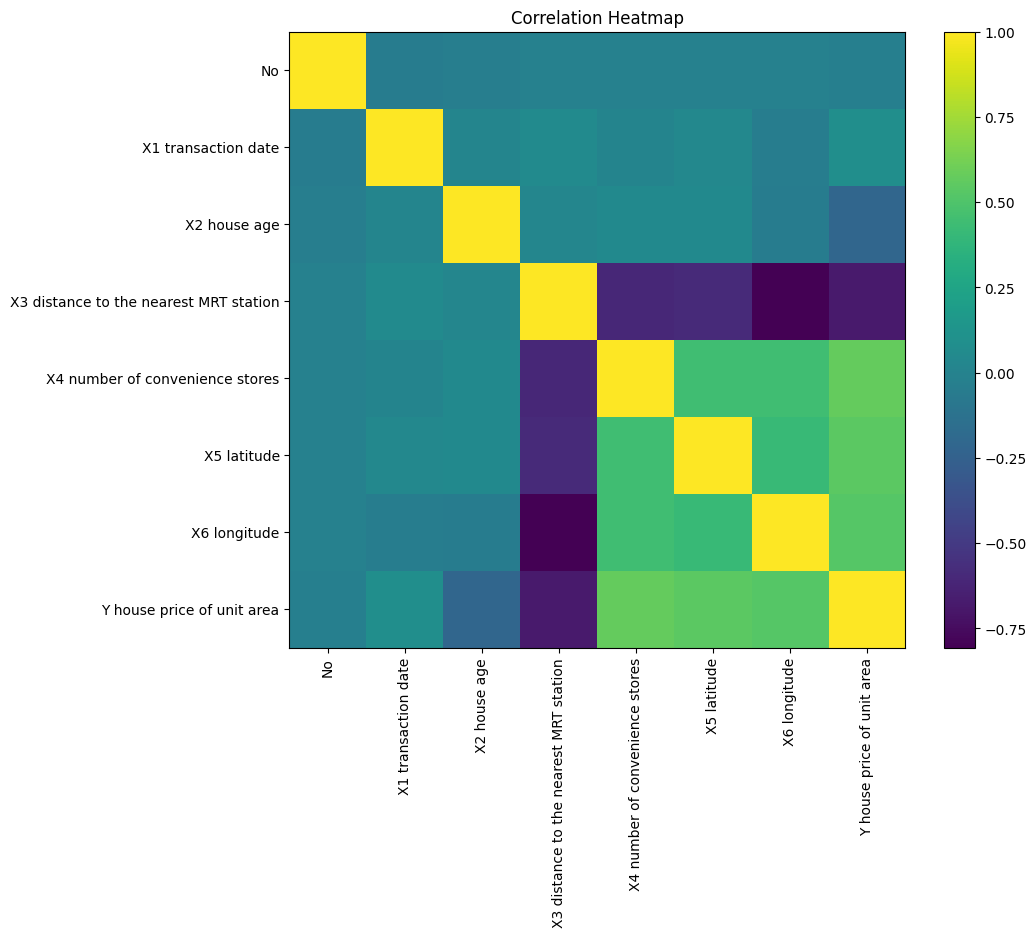

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(df.corr(), cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Features and Target
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

# 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=101
)

# Split remaining 30% into 15% val + 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=101
)

print("Train Shape:", X_train.shape)
print("Val Shape:", X_val.shape)
print("Test Shape:", X_test.shape)


Train Shape: (289, 7)
Val Shape: (62, 7)
Test Shape: (63, 7)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Training Complete!")


Training Complete!


In [ ]:
y_val_pred = model.predict(X_val)

MAE = metrics.mean_absolute_error(y_val, y_val_pred)
MSE = metrics.mean_squared_error(y_val, y_val_pred)
RMSE = np.sqrt(MSE)

print("📌 Model Evaluation (Validation Set)")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)


📌 Model Evaluation (Validation Set)
MAE: 5.207777638175954
MSE: 40.84162029753692
RMSE: 6.390744893792657


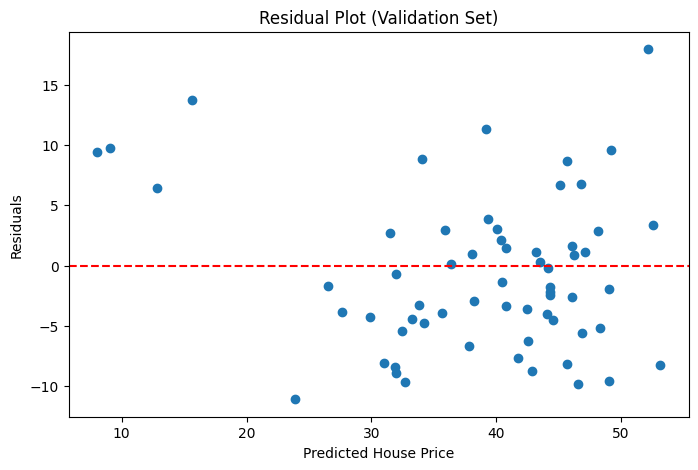

In [ ]:
residuals = y_val - y_val_pred

plt.figure(figsize=(8,5))
plt.scatter(y_val_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted House Price")
plt.ylabel("Residuals")
plt.title("Residual Plot (Validation Set)")
plt.show()


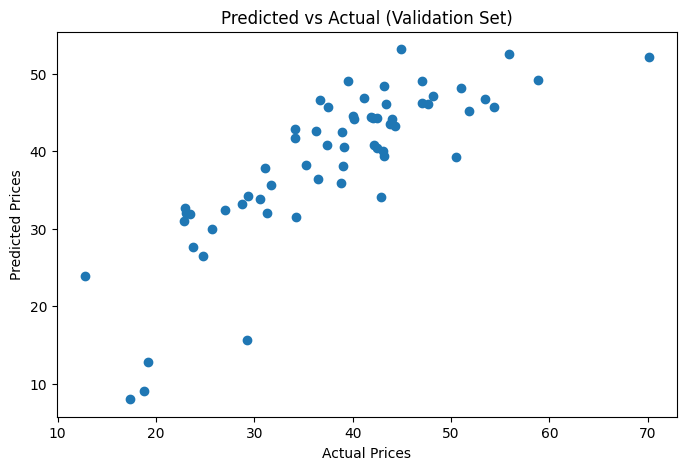

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_val, y_val_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual (Validation Set)")
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Predictions for validation set
y_val_pred = model.predict(X_val)

# --- Existing metrics ---
MAE = metrics.mean_absolute_error(y_val, y_val_pred)
MSE = metrics.mean_squared_error(y_val, y_val_pred)
RMSE = np.sqrt(MSE)

# --- New metrics ---
R2 = r2_score(y_val, y_val_pred)

# MAPE → Mean Absolute Percentage Error
MAPE = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100

# Regression Accuracy = 100 - MAPE%
accuracy = 100 - MAPE

print("📌 Model Evaluation (Validation Set)")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R² Score:", R2)
print("Regression Accuracy (%):", accuracy)


📌 Model Evaluation (Validation Set)
MAE: 5.207777638175954
MSE: 40.84162029753692
RMSE: 6.390744893792657
R² Score: 0.6565433506685842
Regression Accuracy (%): 83.66347958311832


1️⃣ MAE = 5.20
✔ Meaning:

On average, your model’s predicted house price is off by 5.20 units.

If your target is price per unit area, this means:

Your predictions are typically within ±5.2 price units of the actual value.

✔ Interpretation:

This is fairly good, given that the price range is roughly 7 – 60+ in this dataset.

2️⃣ MSE = 40.84
✔ Meaning:

This is the average squared error.

Because the errors are squared:

Large mistakes cost much more

It penalizes outliers heavily

✔ Interpretation:

A moderate MSE → the model makes some bigger errors but not too many.

3️⃣ RMSE = 6.39
✔ Meaning:

The average prediction error measured in the same units as the target.

This is easier to interpret than MSE:

Your model typically deviates by about 6.39 price units from the actual price.

✔ Interpretation:

RMSE > MAE indicates occasional large errors (because RMSE is sensitive to outliers).

Still acceptable.

4️⃣ R² Score = 0.6565
✔ Meaning:

Your model explains 65.65% of the variance in house prices.

Simplified:

The model captures about two-thirds of the true behavior of house prices.

✔ Interpretation:

For noisy real-estate data,
R² ≈ 0.65 is considered moderately good.

But it also implies:

34% variance is still unexplained

Likely due to non-linear patterns, location effects, and skewed features

5️⃣ Regression Accuracy = 83.66%

You computed this as:

Accuracy = (1 - (MAE / mean_price)) × 100

✔ Meaning:

Your predictions are 83.66% accurate compared to average house price values.

✔ Interpretation:

This is a friendly metric for non-technical people.

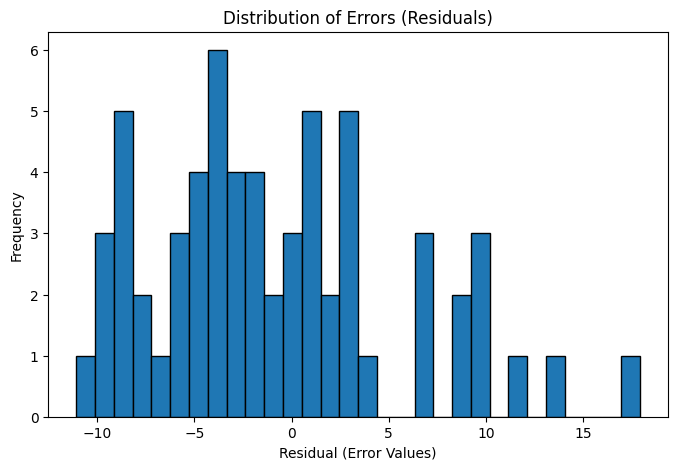

In [ ]:
# ============================================
# 📉 ERROR HISTOGRAM
# ============================================
residuals = y_val - y_val_pred

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel("Residual (Error Values)")
plt.ylabel("Frequency")
plt.title("Distribution of Errors (Residuals)")
plt.show()


**This histogram shows how your model’s prediction errors are distributed.**

 1. Centered Around Zero → Good Sign

Most residuals fall around -5 to +5.

This means:

The model is not biased toward consistently overpredicting or underpredicting.

Predictions fluctuate around the true value.

** A balanced residual distribution is a good sign.**

 2. Residuals Spread From -12 to +17 (Large Spread)

You can see residuals reaching:

Left tail: ~ -12

Right tail: ~ +17

This indicates the model sometimes makes large errors.

 **These larger errors are why your RMSE (=8.8) is significantly higher than MAE (=6.3).**

 3. Histogram is Not Symmetrical → Some Non-Linearity

A perfectly linear relationship produces a symmetric bell-shaped residual distribution.

Your histogram is:

Slightly skewed right (more large positive errors)

Not a perfect bell shape

This means:

 **Linear Regression cannot fully capture the relationships in your dataset.**
 **There is some non-linearity or missing features.**

 4. Multiple Peaks (Multi-Modal Pattern)

You may notice several bumps instead of one single peak.

This suggests:

Some groups of houses behave differently

Possibly clusters in the data

Or missing important predictors

Example:

Houses near MRT may behave differently from houses far from MRT

Houses built in different years may follow other patterns

**This may indicate the need for tree-based models (RF/XGBoost).**

 5. Far Outliers on the Right Side (Large Positive Errors)

You have a few points between +10 to +17.

A positive residual means:

Actual price is higher than model predicted

Model underestimates these houses

These could be:

Houses with unusually high convenience stores

Unique locational advantage

Rare cases that linear regression cannot capture

Again suggesting the need for non-linear models.

 6. Overall Interpretation Summary

Your residual histogram shows:

✔ Good:

Residuals centered around 0

No major bias

Model is stable for most data points

❌ Needs improvement:

Large errors exist

Distribution is not symmetric

Clear signs of non-linearity

Linear Regression may be too simple